<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
import os
from datetime import datetime, date, time, timezone, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [3]:
raw = skd.fetch_california_housing()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
x.columns = [a.lower() for a in x.columns]
x.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
scaler = StandardScaler()
pca = PCA(n_components = 5)
x_ = scaler.fit_transform(x)
x_pca = pca.fit_transform(x_)
res_pca = pd.DataFrame(np.c_[x_pca, y.reshape(-1,1)], columns = [f'pc{a}' for a in range(1,6)] + ['target'])
res_pca.head()

,pc1,pc2,pc3,pc4,pc5,target
0,1.882704,-0.503362,-0.314134,-2.555093,0.128040,4.526
1,1.371120,-0.121406,1.905258,-1.872984,-0.267430,3.585
2,2.086868,-0.501136,-0.937245,-2.100133,0.370032,3.521
3,1.575801,-1.239495,-1.025957,-1.286721,0.318956,3.413
4,1.591206,-1.345264,-1.249171,-0.450778,0.293612,3.422


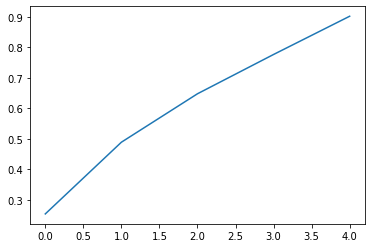

In [15]:
plt.plot(pca.explained_variance_ratio_.cumsum())

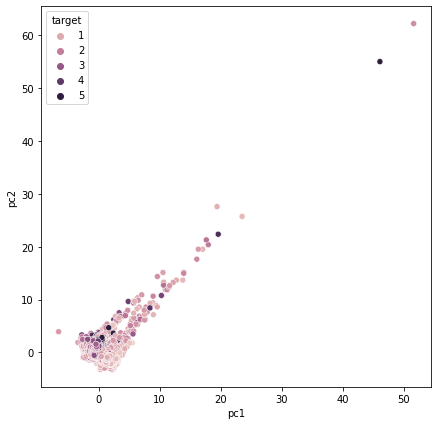

In [17]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = res_pca, x = 'pc1', y = 'pc2', hue = 'target')

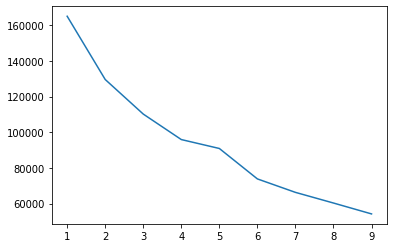

In [22]:
plt.plot(range(1, 10), [KMeans(n_clusters = a).fit(x_).inertia_ for a in range(1, 10)])

In [23]:
x_km = KMeans(n_clusters = 6).fit(x_)

In [33]:
res_pca['cl'] = x_km.labels_
res_pca['cl'] = res_pca['cl'].astype(str)
res_pca.head()

,pc1,pc2,pc3,pc4,pc5,target,cl
0,1.882704,-0.503362,-0.314134,-2.555093,0.128040,4.526,1
1,1.371120,-0.121406,1.905258,-1.872984,-0.267430,3.585,0
2,2.086868,-0.501136,-0.937245,-2.100133,0.370032,3.521,1
3,1.575801,-1.239495,-1.025957,-1.286721,0.318956,3.413,1
4,1.591206,-1.345264,-1.249171,-0.450778,0.293612,3.422,1


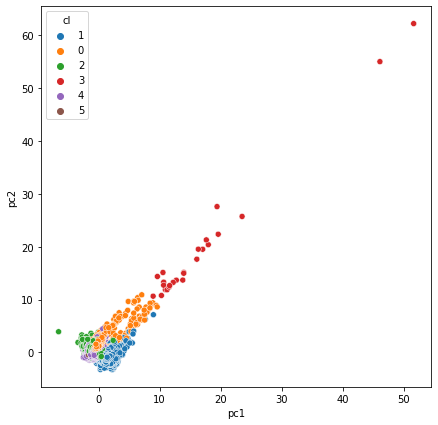

In [36]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = res_pca, x = 'pc1', y = 'pc2', hue = 'cl')

In [39]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

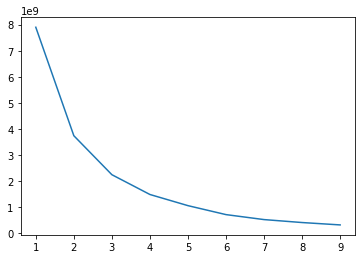

In [45]:
plt.plot(range(1, 10), [KMeans(n_clusters = a).fit(x_te).inertia_ for a in range(1, 10)])

In [57]:
km = KMeans(n_clusters = 6).fit(x_te)

In [58]:
res_pred = pd.DataFrame(np.c_[y_te.reshape(-1,1), pred_rf.reshape(-1,1), km.labels_.reshape(-1,1)],
                        columns = ['y', 'pred', 'cl']
                        )
res_pred['cl'] = res_pred['cl'].astype(str)
res_pred.head()

,y,pred,cl
0,0.85900,1.294640,0.0
1,5.00001,4.445616,1.0
2,1.16400,1.157850,2.0
3,0.87500,1.244980,0.0
4,1.61000,1.692200,2.0


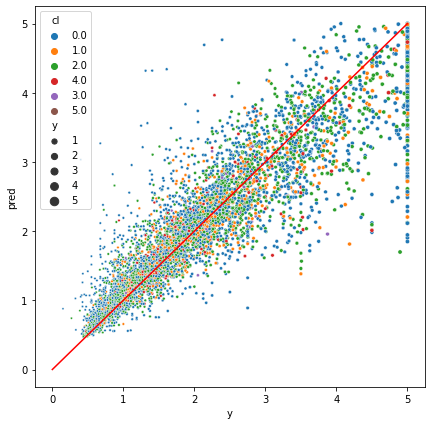

In [59]:
plt.figure(figsize = [7,7])
plt.plot([0,5], [0,5], color = 'red')
sns.scatterplot(data = res_pred, x = 'y', y = 'pred', hue = 'cl', size = 'y', marker = '.')

# customer analysis

In [60]:
os.listdir()

['.config',
 'retail_data_transactions.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'rfm_test.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'retail_data_response.csv',
 'sample_data']

In [61]:
df = pd.read_excel('online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [67]:
df.columns = [a.replace(' ', '_').lower()  for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [65]:
df.columns[6].replace(' ', '_')

'Customer_ID'

In [68]:
df.isnull().sum()

invoice             0
stockcode           0
description      2928
quantity            0
invoicedate         0
price               0
customer_id    107927
country             0
dtype: int64

In [73]:
df_ = df[~df['customer_id'].isnull()]
df_.isnull().sum()

invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64

In [74]:
df_

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [80]:
df_ = df_[(~df_.invoice.astype(str).str.contains('C')) & (df_.country == 'United Kingdom')]
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [90]:
df_.invoicedate = df_.invoicedate.to_numpy().astype('datetime64[m]')
df_['rev'] = df_['price'] * df_['quantity'] 
df_['date'] = df_.invoicedate.to_numpy().astype('datetime64[D]')
df_['month'] = df_['date'].to_numpy().astype('datetime64[M]')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [91]:
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date,month,rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,30.0


In [95]:
df_ = df_[['customer_id', 'date', 'month', 'rev']].rename(columns = {'customer_id':'id'}).sort_values(['id', 'date'])
df_.head()

,id,date,month,rev
27994,12346.0,2009-12-14,2009-12-01,45.0
28251,12346.0,2009-12-14,2009-12-01,22.5
28254,12346.0,2009-12-14,2009-12-01,22.5
39398,12346.0,2009-12-18,2009-12-01,22.5
39411,12346.0,2009-12-18,2009-12-01,1.0


In [98]:
df_pu = df_.groupby(['id', 'month'])['rev'].sum().reset_index()
df_pu.head()

,id,month,rev
0,12346.0,2009-12-01,113.50
1,12346.0,2010-01-01,90.00
2,12346.0,2010-03-01,27.05
3,12346.0,2010-06-01,142.31
4,12608.0,2010-10-01,415.79


In [100]:
list_pu = df_pu.groupby(['id', 'month']).first().reset_index()
list_npu = df_pu.groupby(['id']).first().reset_index()
list_mon = list_pu['month'].sort_values().unique()

In [112]:
for mon in list_mon :

  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['rev'].count().reset_index().rename(columns = {'rev':'pu'})
  temp = temp.assign(npu_month = mon,
              num = temp['month'].rank(method = 'first')).drop(['month'], axis = 1).reindex(['npu_month', 'num', 'pu'], axis = 1)

  temp = temp.assign(ratio = [a/temp['pu'][0] for a in temp['pu']])

  if mon == list_mon[0] :

    res = temp 

  else :

    res = pd.concat([res, temp], axis = 0)

res.head()


,npu_month,num,pu,ratio
0,2009-12-01,1.0,904,1.000000
1,2009-12-01,2.0,318,0.351770
2,2009-12-01,3.0,298,0.329646
3,2009-12-01,4.0,382,0.422566
4,2009-12-01,5.0,342,0.378319


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


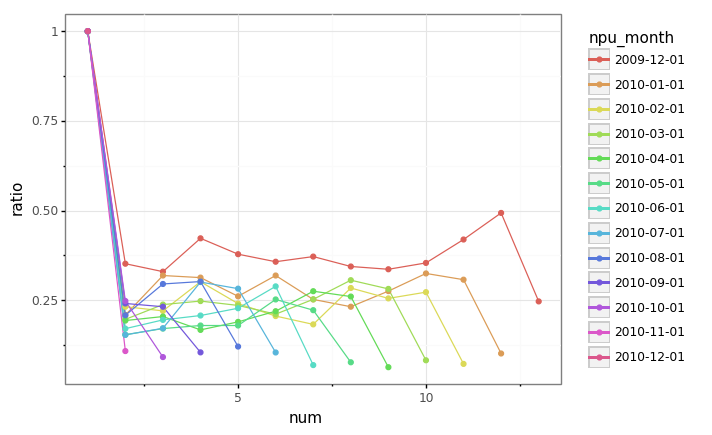

<ggplot: (8764166656925)>

In [113]:
(
    ggplot(res.assign(npu_month = res['npu_month'].astype(str)),
           aes('num', 'ratio', color = 'npu_month')
           ) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

In [117]:
pd.pivot_table(res.assign(ratio = round(res['ratio']*100,2))
               , index = 'npu_month', columns = 'num', values = 'ratio').reset_index()

num,npu_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
0,2009-12-01,100.0,35.18,32.96,42.26,37.83,35.73,37.17,34.40,33.63,35.40,41.92,49.34,24.67
1,2010-01-01,100.0,20.87,31.88,31.30,26.09,31.88,25.22,23.19,27.54,32.46,30.72,10.14,NaN
2,2010-02-01,100.0,23.19,22.03,30.14,24.06,20.58,18.26,28.41,25.51,27.25,7.25,NaN,NaN
3,2010-03-01,100.0,19.66,23.79,24.76,23.54,21.12,25.24,30.58,28.16,8.25,NaN,NaN,NaN
4,2010-04-01,100.0,19.33,20.45,16.73,18.96,21.93,27.51,26.02,6.32,NaN,NaN,NaN,NaN
5,2010-05-01,100.0,15.38,17.09,17.95,17.95,25.21,22.22,7.69,NaN,NaN,NaN,NaN,NaN
6,2010-06-01,100.0,17.07,19.51,20.73,22.76,28.86,6.91,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-07-01,100.0,15.34,17.18,30.06,28.22,10.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-08-01,100.0,20.81,29.53,30.20,12.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-09-01,100.0,24.09,23.18,10.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df_rfm = df_.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df_rfm.head()

,id,date,month,rev
0,12346.0,2009-12-14,2009-12-01,90.0
1,12346.0,2009-12-18,2009-12-01,23.5
2,12346.0,2010-01-04,2010-01-01,45.0
3,12346.0,2010-01-14,2010-01-01,22.5
4,12346.0,2010-01-22,2010-01-01,22.5


In [131]:
info_m = df_rfm.groupby(['id', 'month'])['rev'].sum().reset_index()
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'rev').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'],ascending = [1,0])
info_m = info_m.groupby(id).head(3)
info_m = info_m.groupby('id')['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,372.86
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,254.55
4,12747.0,5080.53


In [154]:
info_f = df_rfm.groupby(['id', 'month'])['rev'].count().reset_index()
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'rev').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'],ascending = [1,0])
info_f = info_f.groupby(id).head(3)
info_f = info_f.groupby('id')['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,7.0
1,12608.0,1.0
2,12745.0,2.0
3,12746.0,1.0
4,12747.0,16.0


In [133]:
date_now = datetime(2010,12,31)
date_now

datetime.datetime(2010, 12, 31, 0, 0)

In [153]:
info_r = df_rfm.groupby('id').agg({'date':[lambda x : (date_now - x.max()).days ]})
info_r.columns = info_r.columns.droplevel(0)
info_r = info_r.reset_index()
info_r.columns = ['id', 'recency']
info_r.head()

,id,recency
0,12346.0,186
1,12608.0,61
2,12745.0,143
3,12746.0,197
4,12747.0,26


In [157]:
info = pd.merge(info_r, info_f, 'outer', 'id')
info = pd.merge(info, info_m, 'outer', 'id')
info.head()

,id,recency,freq,money
0,12346.0,186,7.0,372.86
1,12608.0,61,1.0,415.79
2,12745.0,143,2.0,723.85
3,12746.0,197,1.0,254.55
4,12747.0,26,16.0,5080.53


In [168]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'], 5, list('54321'))
            )

info = info.assign(fm = info['f'].astype(str) + info['m'].astype(str))
info

,id,recency,freq,money,r,f,m,fm
0,12346.0,186,7.0,372.86,4,1,4,14
1,12608.0,61,1.0,415.79,3,5,4,54
2,12745.0,143,2.0,723.85,4,4,3,43
3,12746.0,197,1.0,254.55,4,5,4,54
4,12747.0,26,16.0,5080.53,1,1,1,11
...,...,...,...,...,...,...,...,...
3966,18283.0,39,5.0,641.77,2,1,3,13
3967,18284.0,88,1.0,461.68,3,4,4,44
3968,18285.0,317,1.0,427.00,5,4,4,44
3969,18286.0,133,2.0,1296.43,4,3,2,32


In [169]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [171]:
info = info.assign(fm = info['fm'].replace(seg_map, regex = True))
info.head()

,id,recency,freq,money,r,f,m,fm
0,12346.0,186,7.0,372.86,4,1,4,at_Risk
1,12608.0,61,1.0,415.79,3,5,4,champions
2,12745.0,143,2.0,723.85,4,4,3,potential_loyalists
3,12746.0,197,1.0,254.55,4,5,4,champions
4,12747.0,26,16.0,5080.53,1,1,1,hibernating


In [173]:
cnt_info = info.groupby(['r', 'fm'])['id'].count().reset_index()
cnt_info.head()

,r,fm,id
0,1,about_to_sleep,33
1,1,at_Risk,83
2,1,cant_loose,1
3,1,champions,37
4,1,hibernating,536


In [183]:
cnt_info = cnt_info.assign(ratio = cnt_info.groupby(['r'])['id'].apply(lambda x: x/x.sum()))
cnt_info = pd.melt(cnt_info, id_vars = ['r', 'fm'], var_name = 'type')
cnt_info.head()

,r,fm,type,value
0,1,about_to_sleep,id,33.0
1,1,at_Risk,id,83.0
2,1,cant_loose,id,1.0
3,1,champions,id,37.0
4,1,hibernating,id,536.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


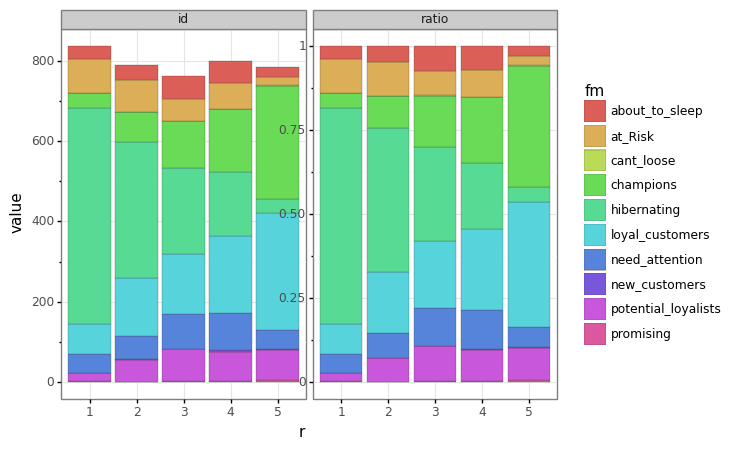

<ggplot: (8764176322969)>

In [186]:
(
    ggplot(cnt_info, aes('r', 'value', fill = 'fm')) + 
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)